The Data for this pizza sales is made up of 4 separate csv files, all of these will be read into separate dataframes, then they will be joined using outer merge, after that unwanted columns will then be dropped.

In [2]:
# Importing the dependecies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing the datasets
df1 = pd.read_csv(r'C:\Users\USER\Desktop\Scanned Documents\pizza_sales\pizzas.csv')
df2 = pd.read_csv(r'C:\Users\USER\Desktop\Scanned Documents\pizza_types.csv', encoding='latin1')
df3 = pd.read_csv(r'C:\Users\USER\Desktop\Scanned Documents\pizza_sales\orders.csv')
df4 = pd.read_csv(r'C:\Users\USER\Desktop\Scanned Documents\pizza_sales\order_details.csv')

In [4]:
df1.head(2)

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75


In [5]:
df2.head(2)

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."


In [6]:
df3.head(2)

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40


In [7]:
df4.head(2)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1


In [8]:
# merging the four dataframes using with outer merge
df5 = pd.merge(df3, df4, on='order_id', how='outer')
df6 = pd.merge(df1, df2, on='pizza_type_id', how='outer')

In [9]:
df5.head(2)

,order_id,date,time,order_details_id,pizza_id,quantity
0,1,2015-01-01,11:38:36,1,hawaiian_m,1
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1


In [10]:
df6.head(2)

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."


In [11]:
# Finally I merge the two tables into one final table to work with.
pizza_df = pd.merge(df5, df6, on='pizza_id', how='outer')

In [12]:
pizza_df.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,11.0,2015-01-01,13:02:59,26.0,bbq_ckn_l,1.0,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,17.0,2015-01-01,13:53:00,43.0,bbq_ckn_l,1.0,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,27.0,2015-01-01,15:11:17,71.0,bbq_ckn_l,1.0,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,33.0,2015-01-01,15:54:08,83.0,bbq_ckn_l,1.0,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
4,51.0,2015-01-01,18:48:28,123.0,bbq_ckn_l,1.0,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."


**Data Cleaning and Preprocessing**

In [14]:
# the following columns will be dropped, order_details_id, pizza_id, and ingredients
pizza_df = pizza_df.drop(columns=['ingredients', 'pizza_id', 'order_details_id'], axis=1)
pizza_df.head(2)

,order_id,date,time,quantity,pizza_type_id,size,price,name,category
0,11.0,2015-01-01,13:02:59,1.0,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken
1,17.0,2015-01-01,13:53:00,1.0,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken


In [15]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48625 entries, 0 to 48624
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       48620 non-null  float64
 1   date           48620 non-null  object 
 2   time           48620 non-null  object 
 3   quantity       48620 non-null  float64
 4   pizza_type_id  48625 non-null  object 
 5   size           48625 non-null  object 
 6   price          48625 non-null  float64
 7   name           48625 non-null  object 
 8   category       48625 non-null  object 
dtypes: float64(3), object(6)
memory usage: 3.3+ MB


In [16]:
pizza_df.isnull().sum()

order_id         5
date             5
time             5
quantity         5
pizza_type_id    0
size             0
price            0
name             0
category         0
dtype: int64

Dates, order_id and time of a transaction should not be empty, it means nothing was sold at that date and time, hence I will remove empty rows

In [18]:
pizza_df = pizza_df.dropna(subset = ['order_id', 'date', 'time'], how='all')

In [19]:
pizza_df.isnull().sum()

order_id         0
date             0
time             0
quantity         0
pizza_type_id    0
size             0
price            0
name             0
category         0
dtype: int64

Date and time are set as objects, they need to be changed to datetime format

In [21]:
pizza_df['date'] = pd.to_datetime(pizza_df['date'])
pizza_df['time'] = pd.to_datetime(pizza_df['time'])

In [22]:
pizza_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48620 entries, 0 to 48624
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       48620 non-null  float64       
 1   date           48620 non-null  datetime64[ns]
 2   time           48620 non-null  datetime64[ns]
 3   quantity       48620 non-null  float64       
 4   pizza_type_id  48620 non-null  object        
 5   size           48620 non-null  object        
 6   price          48620 non-null  float64       
 7   name           48620 non-null  object        
 8   category       48620 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 3.7+ MB


Since we will be calculating total sales in a day or month, we need to create a column that shows the total sales per order.

In [24]:
pizza_df['sales'] = pizza_df['quantity']*pizza_df['price']
pizza_df.head(2)

,order_id,date,time,quantity,pizza_type_id,size,price,name,category,sales
0,11.0,2015-01-01,2025-05-12 13:02:59,1.0,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,20.75
1,17.0,2015-01-01,2025-05-12 13:53:00,1.0,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,20.75


Hourly sales, Daily sales and Monthly sales will be calculated, hence months, weekday and hour will be extracted from the date and time respectively.

In [26]:
pizza_df['order month'] = pizza_df['date'].dt.month_name()
pizza_df['order day'] = pizza_df['date'].dt.day_name()
pizza_df['hour'] = pizza_df['time'].dt.hour
pizza_df.head(2)

,order_id,date,time,quantity,pizza_type_id,size,price,name,category,sales,order month,order day,hour
0,11.0,2015-01-01,2025-05-12 13:02:59,1.0,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,20.75,January,Thursday,13
1,17.0,2015-01-01,2025-05-12 13:53:00,1.0,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,20.75,January,Thursday,13


Using the hour column, i will divide the day into morning(5am - 11:59am), afternoon(12pm - 4:59pm), evening(5pm-8:59pm), and Night(9pm - 4:59pm). In this way we can easily know what hours within a day have the most sales.

In [28]:
time_of_day = [
               (pizza_df['hour'] >= 5) & (pizza_df['hour'] < 12),
               (pizza_df['hour'] >= 12) & (pizza_df['hour'] < 17),
               (pizza_df['hour'] >= 17) & (pizza_df['hour'] < 21),
              ]
segments = ['Morning', 'Afternoon', 'Evening']
pizza_df['Segment of day'] = np.select(time_of_day, segments, default='Night')

In [29]:
pizza_df.head()

,order_id,date,time,quantity,pizza_type_id,size,price,name,category,sales,order month,order day,hour,Segment of day
0,11.0,2015-01-01,2025-05-12 13:02:59,1.0,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,20.75,January,Thursday,13,Afternoon
1,17.0,2015-01-01,2025-05-12 13:53:00,1.0,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,20.75,January,Thursday,13,Afternoon
2,27.0,2015-01-01,2025-05-12 15:11:17,1.0,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,20.75,January,Thursday,15,Afternoon
3,33.0,2015-01-01,2025-05-12 15:54:08,1.0,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,20.75,January,Thursday,15,Afternoon
4,51.0,2015-01-01,2025-05-12 18:48:28,1.0,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,20.75,January,Thursday,18,Evening


In [30]:
pizza_df.shape

(48620, 14)

**Question 1**  
What is the total revenue/sales?

In [32]:
# The total revenue/sales is the sum of all the sales amount from the sales column
Total_Sales_in_USD= pizza_df['sales'].sum()
print('Total sales in USD =', Total_Sales_in_USD)

Total sales in USD = 817860.0499999999


**Question 2**  
Find the total quantity sold

In [34]:
# The total quantity sold is the sum of quantity in the quantity column
Total_quantity = pizza_df['quantity'].sum()
print('Total_quantity =', Total_quantity)

Total_quantity = 49574.0


**Question 3**  
Find the total orders.

In [36]:
# The total number of oders is simply the count of all order_id 
Total_orders = pizza_df['order_id'].count()
print('Total_orders =', Total_orders)

Total_orders = 48620


**Question 4**  
How many pizza types do they sell?

In [38]:
Number_of_pizza_types = pizza_df['name'].nunique()
print('Number of Pizza types sold =', Number_of_pizza_types)

Number of Pizza types sold = 32


These 32 pizza types are broken down into 4 catgories as shown below

**Question 5**  
Find the average price of the pizzas.

In [41]:
average_price_of_pizza = pizza_df['price'].mean()
print('Average Price Of Pizza =', average_price_of_pizza)

Average Price Of Pizza = 16.494132044426163


**Question**  
What are the peak hours of sales?

In [43]:
# To get the peak hours of sell we use the segment of day and sales columns
peak_hours_of_sale = pizza_df.groupby('Segment of day')['sales'].sum().sort_values(ascending=False)
peak_hours_of_sale

Segment of day
Afternoon    400192.70
Evening      306378.60
Night         65966.30
Morning       45322.45
Name: sales, dtype: float64

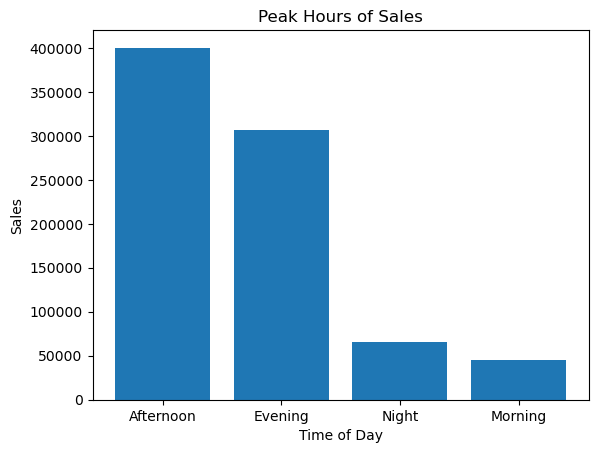

In [44]:
plt.bar(peak_hours_of_sale.index, peak_hours_of_sale.values)
plt.title('Peak Hours of Sales')
plt.xlabel('Time of Day')
plt.ylabel('Sales')
plt.show()

The afternoon hours are the peak hours of selling within the day this is the hours of 12pm to 4:59pm.

**Question 7**  
Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

In [47]:
Total_sales_by_weekday = pizza_df.groupby('order day')['sales'].sum().sort_values(ascending=False)
Total_sales_by_weekday


order day
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
Name: sales, dtype: float64

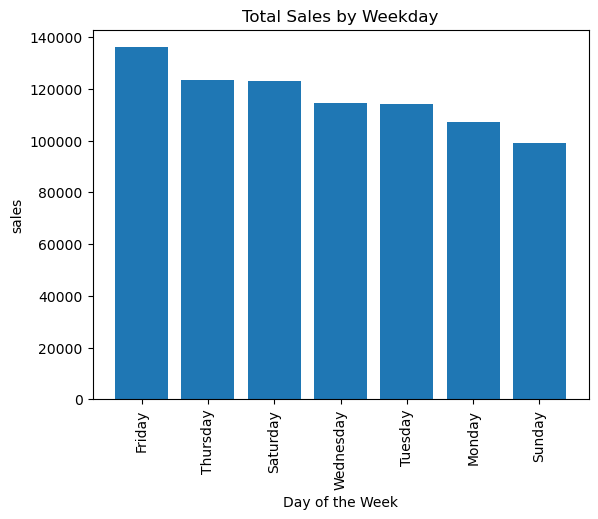

In [48]:
plt.bar(Total_sales_by_weekday.index, Total_sales_by_weekday.values)
plt.xticks(rotation=90)
plt.title("Total Sales by Weekday")
plt.xlabel('Day of the Week')
plt.ylabel('sales')
plt.show()
          

The most sales are made on Friday

**Question 8**  
Find the top 5 bestselling pizzas.

In [51]:
top_5_selling_pizza = pizza_df.groupby('name')['sales'].sum().sort_values(ascending=False).head()
top_5_selling_pizza

name
The Thai Chicken Pizza          43434.25
The Barbecue Chicken Pizza      42768.00
The California Chicken Pizza    41409.50
The Classic Deluxe Pizza        38180.50
The Spicy Italian Pizza         34831.25
Name: sales, dtype: float64

**Question 9**  
Find the sales made in each month. Any trend noticeable?

In [53]:
monthly_sales = pizza_df.groupby('order month')['sales'].sum()
monthly_sales

order month
April        68736.80
August       68278.25
December     64701.15
February     65159.60
January      69793.30
July         72557.90
June         68230.20
March        70397.10
May          71402.75
November     70395.35
October      64027.60
September    64180.05
Name: sales, dtype: float64

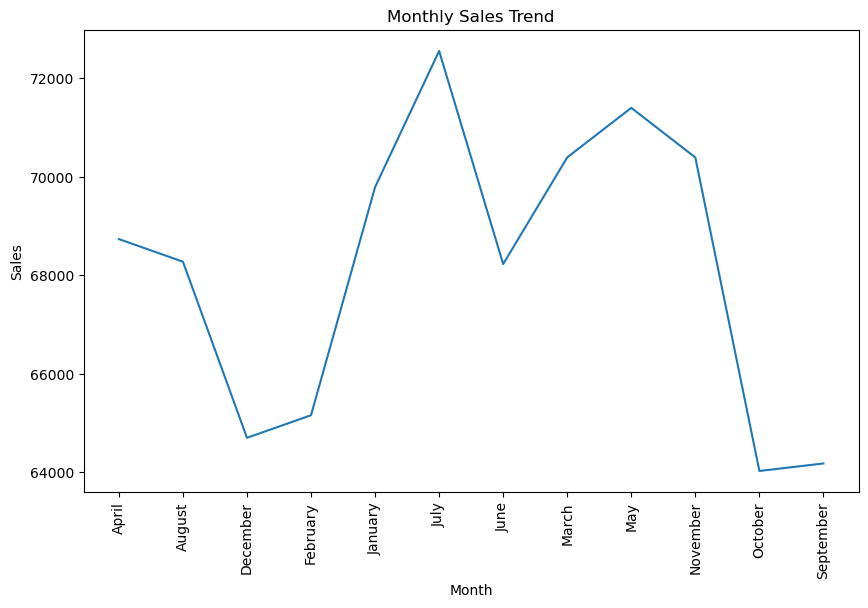

In [54]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt.show()

From the chart above we can see that there is really no visible trend in the sales, as each month has its own unique sale not following the season of the year of major events in the year.

**Question 10**  
Are there pizza types that are not doing well on the menu?

In [57]:
pizza_sales = pizza_df.groupby('name')['sales'].sum().sort_values(ascending=False)
pizza_sales

name
The Thai Chicken Pizza                        43434.25
The Barbecue Chicken Pizza                    42768.00
The California Chicken Pizza                  41409.50
The Classic Deluxe Pizza                      38180.50
The Spicy Italian Pizza                       34831.25
The Southwest Chicken Pizza                   34705.75
The Italian Supreme Pizza                     33476.75
The Hawaiian Pizza                            32273.25
The Four Cheese Pizza                         32265.70
The Sicilian Pizza                            30940.50
The Pepperoni Pizza                           30161.75
The Greek Pizza                               28454.10
The Mexicana Pizza                            26780.75
The Five Cheese Pizza                         26066.50
The Pepper Salami Pizza                       25529.00
The Italian Capocollo Pizza                   25094.00
The Vegetables + Vegetables Pizza             24374.75
The Prosciutto and Arugula Pizza              24193.25
The N

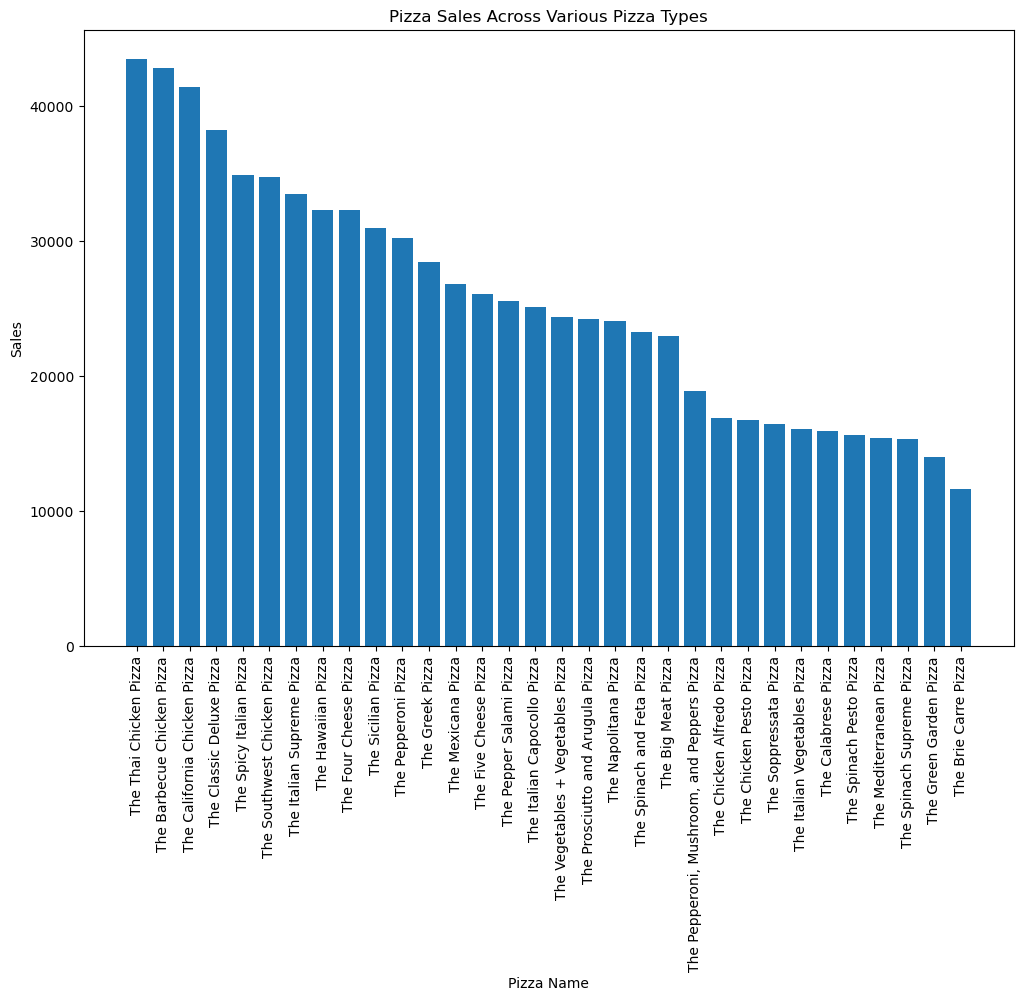

In [58]:
plt.figure(figsize=(12,8))
plt.bar(pizza_sales.index, pizza_sales.values)
plt.title('Pizza Sales Across Various Pizza Types')
plt.xlabel('Pizza Name')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()
          

Pizzas that return less than 15000 in a year can be considered as doing quite poorly and can be removed from the menu.In this case they are:


In [60]:
pizza_sales.tail(2)

name
The Green Garden Pizza    13955.75
The Brie Carre Pizza      11588.50
Name: sales, dtype: float64

**Additionally**

In [62]:
sales_by_size = pizza_df.groupby(['category', 'size'])['sales'].agg([np.sum, np.mean])
sales_by_size
# consider removing XL, XXL from the menu, as there are sales are reasonable low, thus they can concentrate on L, M, and S

sum       mean
category size                      
Chicken  L     102339.00  21.325068
         M      65224.50  17.114799
         S      28356.00  12.859864
Classic  L      74518.50  18.690369
         M      60581.75  14.976947
         S      69870.25  11.693766
         XL     14076.00  25.875000
         XXL     1006.60  35.950000
Supreme  L      94258.50  21.053942
         M      66475.00  16.714860
         S      47463.50  14.283328
Veggie   L     104202.70  19.799107
         M      57101.00  16.075732
         S      32386.75  12.295653

We see from tha table above that certain pizza sizes are not particularly doing well and should be discontinued, they are the XL and XXL. 